In [27]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("activities.csv")
df.head(10)

,activities,adeq_sleep,devicesBR,Rules,count_of_devicesBR,count_of_deviceusage_BR,sleep_more_imapct,sleep_small_impact,usually_enforced,sometimes_enforced,rating,good_bad
0,bath,school_performance,tv,specfic_time_to_bed,1,62,54,80,55,40,1,good
1,music,mood,smartphone,watch_devices_late,2,75,60,90,66,40,1,good
2,sex,behaviour,ipad_tablet,homework,3,60,40,88,55,30,1,good
3,pray,quality_of_life,videogame,play_games_late,4,70,55,85,76,20,1,good
4,read,active,computer,follow_dinner_time,5,67,60,45,70,20,0,bad
5,exercise,extra lessons,laptop,follow_bed_time,6,25,66,45,55,10,0,bad
6,alcohol,send_read_textinbed,mp3,devices_on_off,7,20,70,30,60,40,0,bad
7,talking_to_spouse,pets,0,0,0,0,45,60,0,0,1,good
8,medication,lighting_temp,0,0,0,0,60,30,0,0,0,bad


In [4]:
df = df.dropna()
df = df.drop_duplicates()
df.head(10)

,activities,adeq_sleep,devicesBR,Rules,count_of_devicesBR,count_of_deviceusage_BR,sleep_more_imapct,sleep_small_impact,usually_enforced,sometimes_enforced,rating,good_bad
0,bath,school_performance,tv,specfic_time_to_bed,1,62,54,80,55,40,1,good
1,music,mood,smartphone,watch_devices_late,2,75,60,90,66,40,1,good
2,sex,behaviour,ipad_tablet,homework,3,60,40,88,55,30,1,good
3,pray,quality_of_life,videogame,play_games_late,4,70,55,85,76,20,1,good
4,read,active,computer,follow_dinner_time,5,67,60,45,70,20,0,bad
5,exercise,extra lessons,laptop,follow_bed_time,6,25,66,45,55,10,0,bad
6,alcohol,send_read_textinbed,mp3,devices_on_off,7,20,70,30,60,40,0,bad
7,talking_to_spouse,pets,0,0,0,0,45,60,0,0,1,good
8,medication,lighting_temp,0,0,0,0,60,30,0,0,0,bad


In [5]:
inputs = df.drop('good_bad',axis='columns')

In [6]:
target = df['good_bad']

<AxesSubplot:>

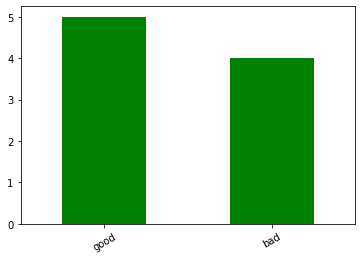

In [7]:
##Barplot to visualize the number of samples for each category in the target variable
df['good_bad'].value_counts().plot.bar( rot=30, color="green", width=0.5)

In [8]:
from sklearn.preprocessing import LabelEncoder
le_activities = LabelEncoder()
le_adeq_sleep = LabelEncoder()
le_devicesBR = LabelEncoder()
le_Rules = LabelEncoder()
le_count_of_devicesBR = LabelEncoder()
le_count_of_deviceusage_BR = LabelEncoder()
le_sleep_more_imapct = LabelEncoder()
le_sleep_small_impact = LabelEncoder()
le_usually_enforced = LabelEncoder()
le_sometimes_enforced = LabelEncoder()
le_rating = LabelEncoder()

In [9]:
inputs['activities'] = le_activities.fit_transform(inputs['activities'])
inputs['adeq_sleep'] = le_adeq_sleep.fit_transform(inputs['adeq_sleep'])
inputs['devicesBR'] = le_devicesBR.fit_transform(inputs['devicesBR'])
inputs['Rules'] = le_Rules.fit_transform(inputs['Rules'])
inputs['count_of_devicesBR'] = le_count_of_devicesBR.fit_transform(inputs['count_of_devicesBR'])
inputs['count_of_deviceusage_BR'] = le_count_of_deviceusage_BR.fit_transform(inputs['count_of_deviceusage_BR'])
inputs['sleep_more_imapct'] = le_sleep_more_imapct.fit_transform(inputs['sleep_more_imapct'])
inputs['sleep_small_impact'] = le_sleep_small_impact.fit_transform(inputs['sleep_small_impact'])
inputs['usually_enforced'] = le_usually_enforced.fit_transform(inputs['usually_enforced'])
inputs['sometimes_enforced'] = le_sometimes_enforced.fit_transform(inputs['sometimes_enforced'])
inputs['rating'] = le_rating.fit_transform(inputs['rating'])


In [10]:
inputs

,activities,adeq_sleep,devicesBR,Rules,count_of_devicesBR,count_of_deviceusage_BR,sleep_more_imapct,sleep_small_impact,usually_enforced,sometimes_enforced,rating
0,1,7,6,6,1,4,2,3,1,4,1
1,4,4,5,7,2,7,4,6,3,4,1
2,7,1,2,4,3,3,0,5,1,3,1
3,5,6,7,5,4,6,3,4,5,2,1
4,6,0,1,3,5,5,4,1,4,2,0
5,2,2,3,2,6,2,5,1,1,1,0
6,0,8,4,1,7,1,6,0,2,4,0
7,8,5,0,0,0,0,1,2,0,0,1
8,3,3,0,0,0,0,4,0,0,0,0


In [11]:
target

0    good
1    good
2    good
3    good
4     bad
5     bad
6     bad
7    good
8     bad
Name: good_bad, dtype: object

In [12]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [13]:
model.fit(inputs, target)

DecisionTreeClassifier()

In [14]:
model.score(inputs,target)

1.0

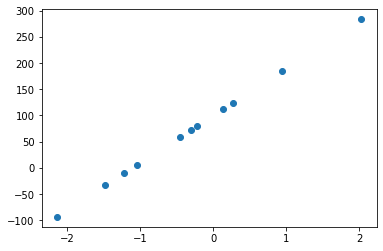

In [15]:
from sklearn.datasets import make_regression

inputs, target = make_regression(n_samples=11, n_features=1, bias=100)
plt.scatter(inputs, target)

In [16]:
###The response or output is directly proportional to the input We can see from the data that we have a linear trend in our model. 
# (The response or output is directly proportional to the input) We can use Linear Regression to fit a line through the data.

In [17]:
##Is bath, often, mean rating good ?

model.predict([[1,7,6,6,1,4,2,3,1,4,1]])


array(['good'], dtype=object)

In [18]:
##having more devices in BR, is it good or bad ?

model.predict([[0,8,4,1,7,1,6,0,2,4,0]])


array(['bad'], dtype=object)

In [19]:
## strong rules, is it good or bad ?
model.predict([[4,4,5,7,2,7,4,6,3,4,1]])

array(['good'], dtype=object)

In [20]:
##is less sleep affecting??
model.predict([[0,8,4,1,7,1,6,0,2,4,0]])

array(['bad'], dtype=object)

In [21]:
import joblib

In [22]:
model = joblib.dump(model,'sleep_analysis.ml')

In [28]:
pip install Flask

  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 0.16.1
    Uninstalling Werkzeug-0.16.1:
      Successfully uninstalled Werkzeug-0.16.1
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [29]:
pip install Flask-Cors==1.10.3

  Using cached Flask-Cors-1.10.3.tar.gz (28 kB)
  Created wheel for Flask-Cors: filename=Flask_Cors-1.10.3-py3-none-any.whl size=11535 sha256=c64b4b82d5c2a23516579d79c7a2ed256bd5aa9bd6099dd38ca4bca4ccaa82c3
  Stored in directory: c:\users\praveena\appdata\local\pip\cache\wheels\08\26\65\03212d02401765a02cefc934991aca5e98d6c02ae3a9576515
Successfully built Flask-Cors
Note: you may need to restart the kernel to use updated packages.


In [33]:
import flask
from flask import request

In [35]:
from flask_cors import CORS
